In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


AP Lab Project
Company Bankruptcy Preidiction Model

Aryan Gupta (2228017)
Parijat Roy (2228125)
Dattatreyo Basu (2228022)
Kanish Srivastava (2228173)


In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, cv
import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV

In [4]:
#Loading and reading the first 5 records of the dataset
df = pd.read_csv("../input/company-bankruptcy-prediction/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


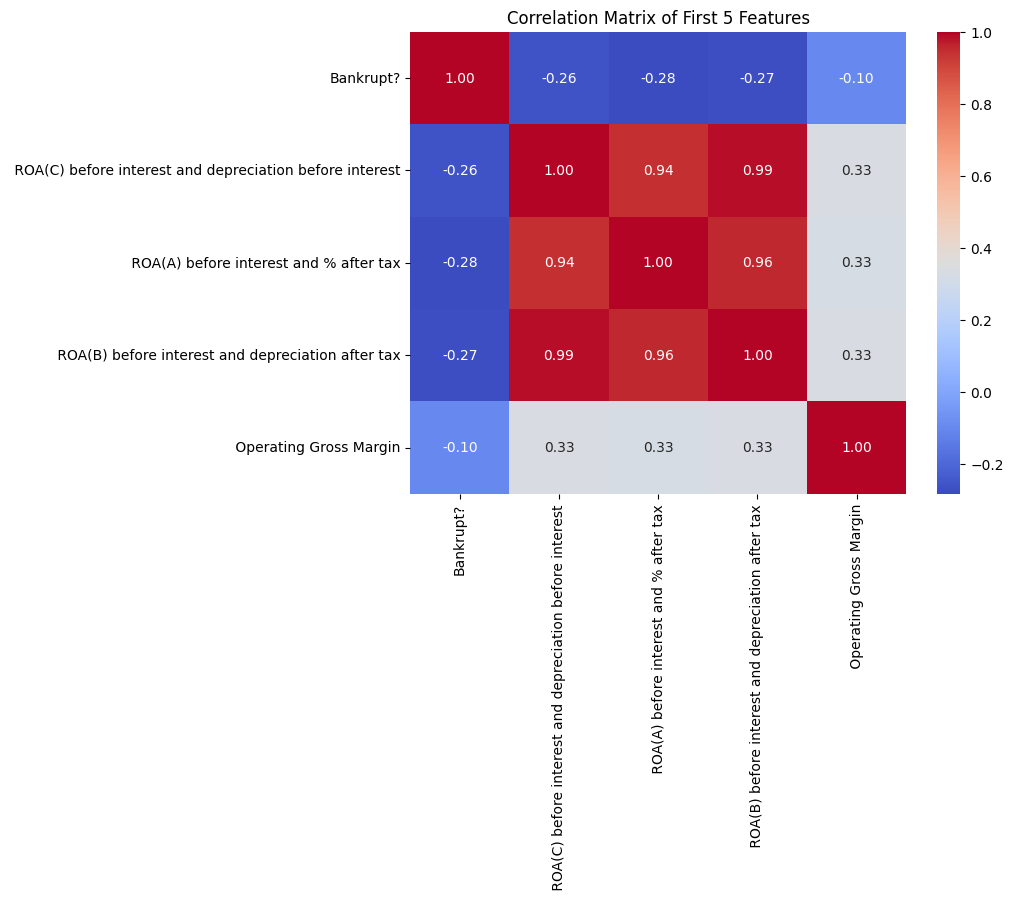

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the first 5 features for correlation matrix
corr_matrix = df.iloc[:, :5].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of First 5 Features')
plt.show()



In [5]:
X_df = df.iloc[:, 1:]
y_df = df.iloc[:, 0]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=123, stratify=y_df)

In [6]:
xgb = XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=50, use_label_encoder=False)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
Acc_score = accuracy_score(pred, y_test)
F1_score = f1_score(pred, y_test)
Precision_score = precision_score(pred, y_test)
print("Acc score : {:.2f}".format(Acc_score))
print("F1 score : {:.2f}".format(F1_score))
print("Precision score : {:.2f}".format(Precision_score))

Acc score : 0.97
F1 score : 0.16
Precision score : 0.09


In [7]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)

In [8]:
xgb = XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=50, use_label_encoder=False,
                   objective = "binary:hinge")

for train_idx, test_idx in cv.split(X_df, y_df):
    x_train, x_test = X_df.iloc[train_idx, :], X_df.iloc[test_idx, :]
    y_train, y_test = y_df[train_idx], y_df[test_idx]
    
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    pred2=xgb.predict(x_train)
    Acc_score1 = accuracy_score(pred2, y_train)
    Acc_score = accuracy_score(pred, y_test)
    F1_score = f1_score(pred, y_test)
    Precision_score = precision_score(pred, y_test)
    print("Acc score : {:.2f}".format(Acc_score))
    print("F1 score : {:.2f}".format(F1_score))
    print("Precision score : {:.2f}".format(Precision_score))
    

Acc score : 0.96
F1 score : 0.33
Precision score : 0.29
Acc score : 0.96
F1 score : 0.28
Precision score : 0.22
Acc score : 0.96
F1 score : 0.38
Precision score : 0.38
Acc score : 0.97
F1 score : 0.41
Precision score : 0.35


In [9]:
xgb = XGBClassifier()
# use_label_encoder=False, objective="binary:hinge"

xgb_param_grid = {'max_depth': [10,20], 'n_estimators': [10,20], 'learning_rate': [0.1],
                 'use_label_encoder' : [False], 'objective' : ["binary:hinge"]}

hr_grid = GridSearchCV(estimator=xgb,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=8,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

hr_grid.fit(X_df, y_df)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=8,
             param_grid={'learning_rate': [0.1], 'max_depth': [10, 20],
                         'n_estimators': [10, 20],
                         'objective': ['binary:hinge'],
                         'use_label_encoder': [False]},
             return_train_score=True, scoring='roc_auc')

In [10]:
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_objective,param_use_label_encoder,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.753571,0.256683,0.064340,0.011884,0.1,10,10,binary:hinge,False,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",...,0.655075,0.038927,2,0.946023,0.940341,0.948864,0.937405,0.934375,0.941402,0.005357
1,4.312072,0.353570,0.071733,0.014209,0.1,10,20,binary:hinge,False,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",...,0.647575,0.038199,3,0.954545,0.954545,0.951705,0.951705,0.943182,0.951136,0.004175
2,3.348344,0.493348,0.068772,0.017395,0.1,20,10,binary:hinge,False,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",...,0.656666,0.033267,1,0.960227,0.957386,0.948864,0.960227,0.951705,0.955682,0.004616
3,3.570669,0.168885,0.022219,0.004621,0.1,20,20,binary:hinge,False,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",...,0.639090,0.040709,4,0.965909,0.977273,0.960227,0.963068,0.957386,0.964773,0.006865


In [11]:
hr_grid_df[hr_grid_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_objective,param_use_label_encoder,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,3.348344,0.493348,0.068772,0.017395,0.1,20,10,binary:hinge,False,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",...,0.656666,0.033267,1,0.960227,0.957386,0.948864,0.960227,0.951705,0.955682,0.004616


## Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt_model = DecisionTreeClassifier()

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40]
}

In [16]:
grid_search = GridSearchCV(dt_model, params, cv = 5 )

In [17]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 30, 40]})

In [18]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 40}


In [19]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)

In [20]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=30)

In [21]:
#dt_pred = dt_model.predict(x_test)

In [22]:
y_probs = dt_model.predict_proba(x_test)[:, 1]  
optimal_threshold =  0.290322580645161 # Replace with your calculated threshold
dt_pred = (y_probs >= optimal_threshold).astype(int)

In [23]:
train_dt_pred = dt_model.predict(x_train)

In [24]:
Acc_score = accuracy_score(pred, dt_pred)
F1_score = f1_score(pred, dt_pred)
Precision_score = precision_score(pred, dt_pred)
print("Acc score : {:.2f}".format(Acc_score))
print("F1 score : {:.2f}".format(F1_score))
print("Precision score : {:.2f}".format(Precision_score))
    

Acc score : 0.97
F1 score : 0.55
Precision score : 0.44


In [25]:
from sklearn.metrics import precision_recall_curve

y_probs = dt_model.predict_proba(x_test)[:, 1]  
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[f1_scores.argmax()]
print(f"Best threshold for F1: {best_threshold}")


y_pred = (y_probs >= best_threshold).astype(int)

Best threshold for F1: 0.2903225806451613


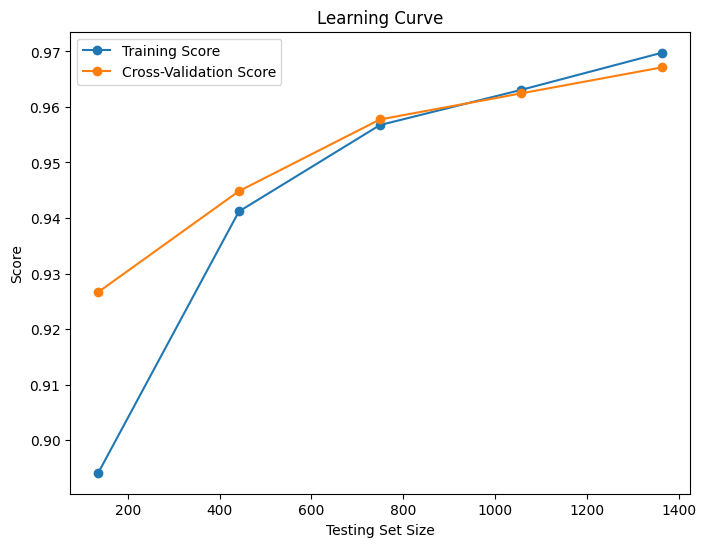

In [31]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(dt_model, x_test, y_test, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score", marker='o')
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-Validation Score", marker='o')
plt.title("Learning Curve")
plt.xlabel("Testing Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()

## SMOTE 

In [6]:
from imblearn.over_sampling import SMOTE
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

In [7]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

<Axes: xlabel='Bankrupt?', ylabel='count'>

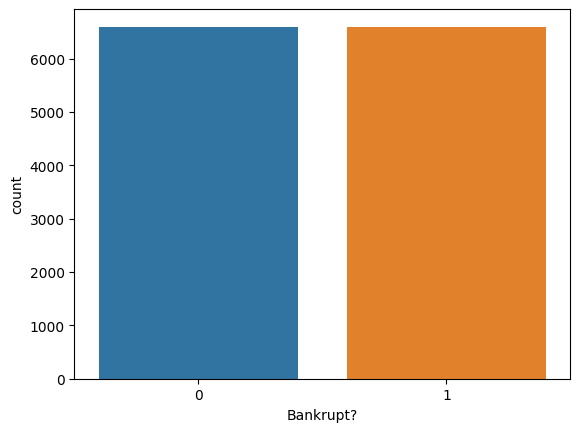

In [8]:
import seaborn as sns
sns.countplot(x=y)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

feature_selection=SelectKBest(f_classif,k=30).fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [11]:
selected_features=X.columns[feature_selection.get_support()]

In [12]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

## Logisitic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
log_reg.score(X_test,y_test)

0.9098484848484848

In [15]:
y_pred=log_reg.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
accuracy_score(y_test,y_pred)

0.9098484848484848

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1975
           1       0.90      0.92      0.91      1985

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



## Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
y_pred_clf=clf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.91


In [26]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro', 'micro', or 'weighted' as needed
print(f'F1-score: {f1:.2f}')

F1-score: 0.91


In [27]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')


Precision: 0.91


In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = X_train.columns.tolist()

# Define class names based on your target labels (adjust as needed)
class_names = ["Non-Bankrupt", "Bankrupt"] 

plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## XGBoost

In [32]:
import xgboost as xgb

xlf = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss')
xlf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred = xlf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [35]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

Precision: 0.97


In [36]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro', 'micro', or 'weighted' as needed
print(f'F1-score: {f1:.2f}')

F1-score: 0.97


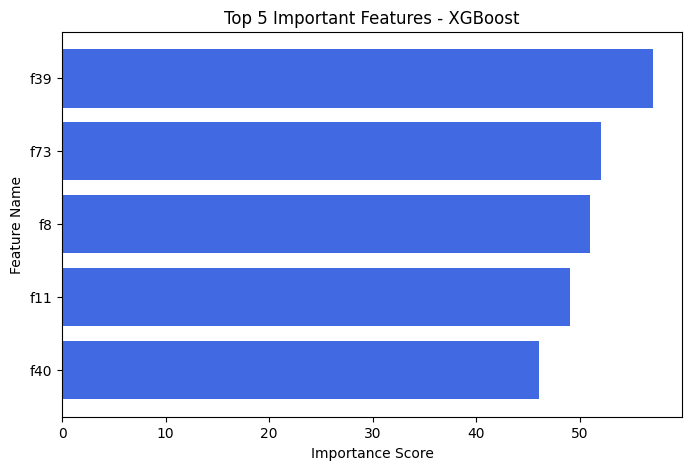

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb

# Get feature importance scores
importance = xlf.get_booster().get_score(importance_type="weight")  # Can also use "gain" or "cover"
importance_df = pd.DataFrame(importance.items(), columns=["Feature", "Importance"])

# Sort and select top 5 features
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(5)

# Plot top 5 features
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 5 Important Features - XGBoost")
plt.gca().invert_yaxis()  # Invert for better visualization
plt.show()


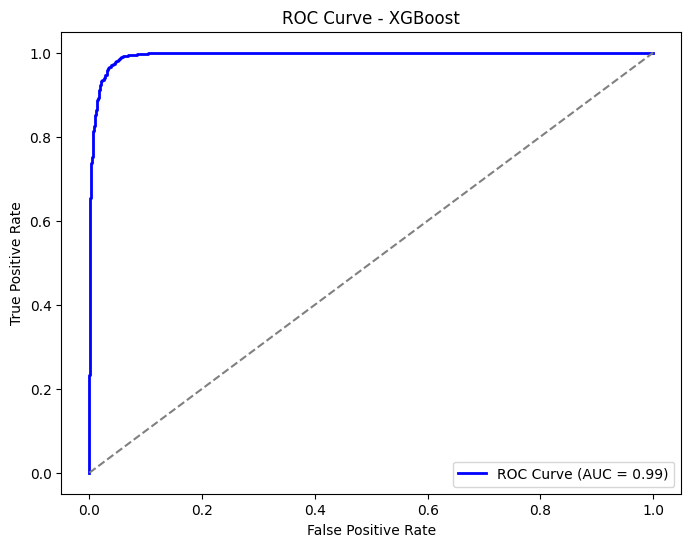

In [41]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = xlf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()


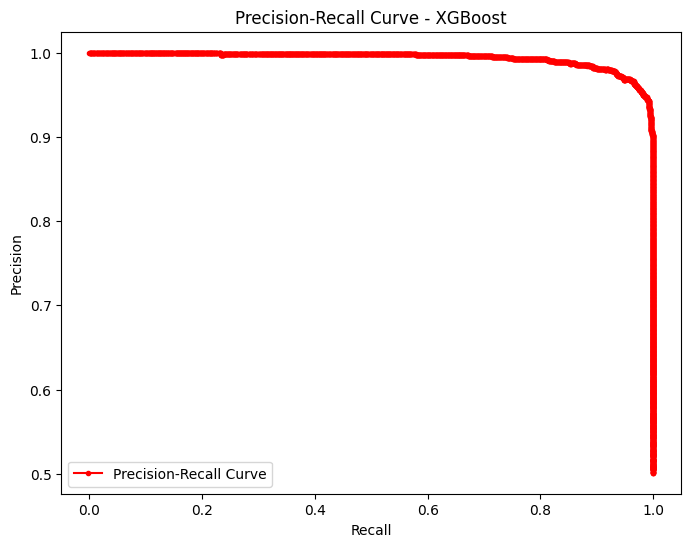

In [42]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", color="red", label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.legend()
plt.show()


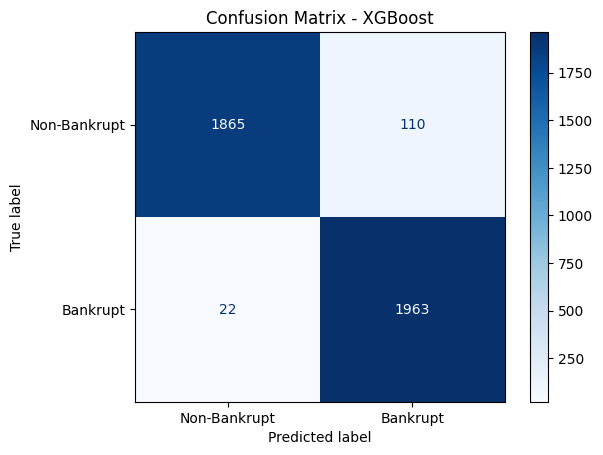

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = xlf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Bankrupt", "Bankrupt"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - XGBoost")
plt.show()
